<a href="https://colab.research.google.com/github/hongsamhc2/AutoTradingSystem/blob/master/deeplearning/keras/stock_data_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주식 데이터 훈련셋 분할


In [247]:
# import package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [196]:
# read csv - daily stock data - stock code 'A000020'

df = pd.read_csv('/content/drive/My Drive/datasets/stock/DA000020.csv')
df.head(3)

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
0,20201007,0,23500,23550,23100,23500,-250,315924,7378000000,178073,136676,27931000,656389000000,949805,3.40,100.0,1528,0,0.0,0,0.0,0.0,53
1,20201006,0,24100,24350,23350,23750,-350,463912,10998000000,274377,179115,27931000,663361000000,949805,3.40,100.0,-6937,0,0.0,0,0.0,0.0,53
2,20201005,0,22200,24350,21700,24100,2250,1094057,25444000000,475953,595364,27931000,673137000000,992087,3.55,100.0,4716,0,0.0,0,0.0,0.0,50


In [197]:
# copy DateFrame 
df_stock = df.copy()

In [198]:
# transform 'date' datatype -> str

df_stock['date'] = df_stock['date'].astype('str')

In [199]:
# transform 'date' datatype -> datetime

df_stock['date'] = pd.to_datetime(df_stock['date'])

In [200]:
# set index -> column 'date'

df_stock.set_index(df_stock['date'],inplace=True)
df_stock.drop(['date'],axis=1,inplace=True)

In [201]:
df_stock.sort_values(by=['date'],inplace=True)

In [202]:
#check df_stock shape

df_stock.shape

(10940, 22)

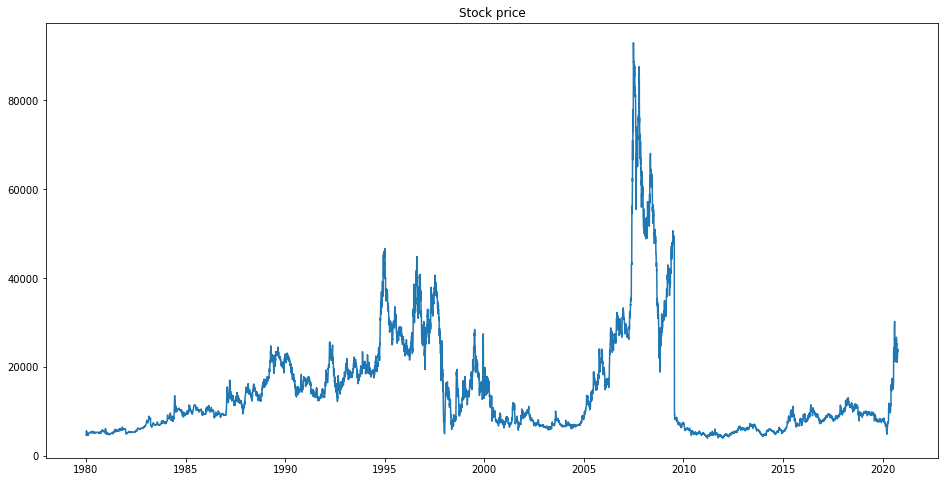

In [203]:
# draw chart
plt.figure(figsize = (16,8))
plt.title('Stock price')
plt.plot(df_stock['close'])


In [204]:
data = df_stock['close'].values

In [205]:
data

array([ 4700,  4700,  4990, ..., 24100, 23750, 23500])

In [206]:
data.shape

(10940,)

In [207]:
dataset = []
for i in data:
  dataset.append([i])

In [208]:
dataset = np.array(dataset)

In [209]:
dataset

array([[ 4700],
       [ 4700],
       [ 4990],
       ...,
       [24100],
       [23750],
       [23500]])

In [210]:
dataset.shape

(10940, 1)

In [211]:
dataset[0:60,0]

array([4700, 4700, 4990, 5290, 5700, 5700, 5640, 5600, 5380, 5290, 5250,
       5080, 5050, 5000, 5000, 5000, 5000, 4990, 4990, 4990, 4700, 5000,
       5100, 5200, 5200, 5200, 5000, 5000, 5000, 4980, 4690, 4720, 5020,
       5020, 5020, 5020, 5020, 5020, 5020, 5020, 5030, 5030, 5030, 5030,
       5030, 5030, 5300, 5290, 5300, 5300, 5300, 5300, 5300, 5300, 5300,
       5300, 5290, 5300, 5300, 5300])

In [212]:
dataset[60,0]

5300

In [213]:
df_stock['label'] = df_stock['close'].shift(-1)

In [214]:
df_stock

,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,label
date,,,,,,,,,,,,,,,,,,,,,,,
1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,4700.0
1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,4990.0
1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,5290.0
1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,5700.0
1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,0,22100,22500,21500,22000,-100,442765,9716000000,270145,163128,27931000,614482000000,1032831,3.70,100.00,-1605,0,0.0,0,0.0,0.0,53,21850.0
2020-09-29,0,22000,22050,20700,21850,-150,551123,11831000000,298463,235825,27931000,610292000000,1050663,3.76,100.00,2568,0,0.0,0,0.0,0.0,53,24100.0
2020-10-05,0,22200,24350,21700,24100,2250,1094057,25444000000,475953,595364,27931000,673137000000,992087,3.55,100.00,4716,0,0.0,0,0.0,0.0,50,23750.0


In [233]:
scaler = MinMaxScaler(feature_range=(0,1))
df_stock_scaled = scaler.fit_transform(df_stock)


In [234]:
y_label = df_stock_scaled[:,-1]
y_label

array([0.00708422, 0.01034522, 0.01371866, ..., 0.22129765, 0.21848645,
              nan])

In [236]:
X_features = df_stock_scaled[:,1:len(df_stock.columns)]

In [237]:
X_features 

array([[0.00721078, 0.00625652, 0.01010344, ..., 0.        , 0.        ,
        0.00708422],
       [0.00721078, 0.00625652, 0.01010344, ..., 0.        , 0.        ,
        0.01034522],
       [0.0102414 , 0.0092805 , 0.01359153, ..., 0.        , 0.        ,
        0.01371866],
       ...,
       [0.19009301, 0.21115746, 0.21457782, ..., 0.        , 0.85714286,
        0.22129765],
       [0.20994879, 0.21115746, 0.23442386, ..., 0.        , 1.        ,
        0.21848645],
       [0.20367855, 0.20281543, 0.23141689, ..., 0.        , 1.        ,
               nan]])

In [238]:
X_features_len = len(X_features)

In [239]:
X_features_len

10940

In [240]:
training_data_len = math.ceil(X_features_len * 0.8)

In [241]:
training_data_len

8752

In [253]:
X_train = X_features[:training_data_len]
X_train

array([[0.00721078, 0.00625652, 0.01010344, ..., 0.        , 0.        ,
        0.00708422],
       [0.00721078, 0.00625652, 0.01010344, ..., 0.        , 0.        ,
        0.01034522],
       [0.0102414 , 0.0092805 , 0.01359153, ..., 0.        , 0.        ,
        0.01371866],
       ...,
       [0.00637475, 0.00563087, 0.00853981, ..., 0.        , 0.85714286,
        0.00607219],
       [0.00585223, 0.00583942, 0.00841953, ..., 0.        , 1.        ,
        0.00528506],
       [0.00616574, 0.00589155, 0.00817898, ..., 0.        , 1.        ,
        0.00573485]])

In [244]:
X_test = X_features[training_data_len:X_features_len]
X_test.shape

(2188, 22)

In [245]:
y_train = y_label[:training_data_len]
y_test = y_label[training_data_len:X_features_len]

In [246]:
type(X_features)

numpy.ndarray

In [249]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [250]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [252]:
model.fit(X_train,y_train,batch_size = 1,epochs = 1)

ValueError: ignored